# Shreyas Ravi
# DSC 478
# Assignment 4

In [ ]:
import numpy as np
import pandas as pd

# Question 1(a)

In [91]:
m_jokes_df=pd.read_csv('modified_jester_data.csv', header=None)

In [92]:
dataMat=m_jokes_df.to_numpy()

In [93]:
jokes_df = pd.read_csv('jokes.csv', header=None)

In [94]:
jokes = jokes_df.to_numpy()

In [95]:
jokes.shape

(100, 2)

In [96]:
dataMat.shape

(1000, 100)

# Question1(b)

In [97]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T,\
                             xformedItems[j,:].T)
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [98]:
def standEst(dataMat, user, simMeas, item):
    n = dataMat.shape[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = np.nonzero(np.logical_and(dataMat[:,item]>0, \
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], \
                                   dataMat[overLap,j])
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [99]:
def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * np.corrcoef(inA, inB, rowvar = 0)[0][1]

In [100]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsSim):
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	
    
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
        
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u
    

In [101]:
def test(dataMat, test_ratio, estMethod):
    error_l = []
    count_l = []
    for i in range(len(dataMat)): 
        error_u, count_u = cross_validate_user(dataMat, i, test_ratio, estMethod=standEst, simMeas=pearsSim)
        error_l.append(error_u)
        count_l.append(count_u)
    mae = sum(error_l)/sum(count_l)
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, for all users
    print('Mean Absoloute Error for ',estMethod,' : ', mae)

In [102]:
test(dataMat, 0.2, svdEst)

Mean Absoloute Error for  <function svdEst at 0x7fa6385bb1f0>  :  3.6971936746875262


# Question 1(c)

In [103]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsSim):
    dataSetSize = dataMat.shape[1]
    distance = []
    for i in range(dataSetSize):
        distance.append(1.0 - metric(dataMat[:,i], dataMat[:,queryJoke]))
    print("The query joke is :", jokes[queryJoke,1])
    indices = np.array(distance).argsort()[1:k+1]
#     print(indices)
    for i in indices:
        print("\n\nJoke: ", jokes[i,1], "\tDistance: ", distance[i])
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned jokes.

In [104]:
print_most_similar_jokes(dataMat, jokes, 3, 3)

The query joke is : Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.


Joke:  What do you get when you run over a parakeet with a lawnmower? Shredded tweet. 	Distance:  0.16637074212389624


Joke:  A country guy goes into a city bar that has a dress code and the maitred' demands he wear a tie. Discouraged the guy goes to his car to sulk when inspiration strikes: He's got jumper cables in the trunk! So he wraps them around his neck sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d' is reluctant but says to the guy "Okay you're a pretty resourceful fellow you can come in... but just don't start anything"!   	Distance:  0.17651439946576852


Joke:  Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert. 	Distance:  0.18528337280182083


# Question 2(a)

In [105]:
data = pd.read_csv('segmentation_data.txt', header=None)

In [106]:
data_class = pd.read_csv('segmentation_classes.txt', sep='\t', header=None)

In [107]:
data.shape

(2100, 19)

In [108]:
data_class.shape

(2100, 2)

In [109]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [110]:
data_class.head()

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [113]:
data_t = scaler.transform(data)

# Question 2(b)

In [114]:
from sklearn.cluster import KMeans
import numpy as np

In [115]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(data_t)

In [116]:
print(kmeans.cluster_centers_)

[[2.56103232e-01 3.93468137e-01 0.00000000e+00 7.45098018e-02
  1.91176471e-02 7.73428799e-02 4.10042113e-03 6.05736165e-02
  4.96748748e-03 1.48187304e-01 1.38085139e-01 1.85159837e-01
  1.18538808e-01 7.16906282e-01 3.44013845e-01 3.55458216e-01
  1.85413237e-01 4.11986237e-01 2.01889852e-01]
 [5.35098814e-01 1.50166667e-01 0.00000000e+00 2.77777769e-02
  1.66666667e-03 3.02281387e-02 5.42887957e-04 2.67660451e-02
  5.86661900e-04 8.23246433e-01 7.79716377e-01 8.94170356e-01
  7.88760696e-01 2.70665440e-01 6.66372551e-01 2.89386481e-01
  8.94170356e-01 2.11804171e-01 1.25065773e-01]
 [5.13993692e-01 8.08936588e-01 0.00000000e+00 7.74410751e-02
  5.05050505e-03 5.44737633e-02 1.40719343e-03 4.63349822e-02
  1.40097198e-03 1.08789943e-01 9.14029557e-02 9.24140773e-02
  1.42676436e-01 6.79161019e-01 7.90017879e-02 8.21286885e-01
  1.34900800e-01 4.14491323e-01 8.92332630e-01]
 [3.02505527e-01 5.30861582e-01 0.00000000e+00 5.22598854e-02
  4.66101695e-02 1.00816850e-01 9.42021613e-03 8.3

In [117]:
centers = np.array(kmeans.cluster_centers_)

In [118]:
import matplotlib.pyplot as plt

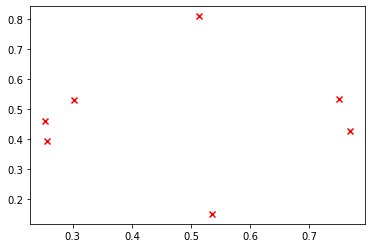

In [119]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

In [120]:
from sklearn import metrics

In [121]:
kmeans_pred = kmeans.predict(data_t)

In [122]:
metrics.homogeneity_score(data_class[1], kmeans_pred)

0.6109347107661537

In [123]:
metrics.completeness_score(data_class[1], kmeans_pred)

0.6126346286442208

# Question 2(c)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA()
pca.fit(data_t)

PCA()

In [126]:
print(pca.explained_variance_ratio_)

[6.07142340e-01 1.31969792e-01 1.01237729e-01 4.54353920e-02
 3.54736114e-02 1.98803550e-02 1.89197030e-02 1.61540880e-02
 1.06560085e-02 7.11337518e-03 3.92203525e-03 1.57500309e-03
 4.89150725e-04 3.14164135e-05 2.36381041e-16 1.58615946e-16
 1.52966845e-16 1.44466875e-16 2.87118866e-35]


Based on the explained variance ratio above we reach 95% accountability with 7 principle components. 

In [127]:
pca1 = PCA(n_components=7)
pca1.fit(data_t)

PCA(n_components=7)

In [128]:
print(pca1.explained_variance_ratio_)

[0.60714234 0.13196979 0.10123773 0.04543539 0.03547361 0.01988035
 0.0189197 ]


In [129]:
(pca1.explained_variance_ratio_).sum() #atleast 95% accounted for with 7 PC's

0.9600589227704955

In [130]:
data_pca = pca1.transform(data_t)

# Question 2(d)

In [131]:
kmeans_pca = KMeans(n_clusters=7, random_state=0).fit(data_pca)

In [132]:
kmeans_pca_pred = kmeans_pca.predict(data_pca)

In [133]:
metrics.homogeneity_score(data_class[1], kmeans_pca_pred)

0.6091364049733291

In [134]:
metrics.completeness_score(data_class[1], kmeans_pca_pred)

0.6107955063694608

# Question 2(e)

From above we can see that even with less data we can get similar completeness and homogeneity scores compared to the scores we got previously. Despite there being a very small change in the homogeneity and completeness score before and after PCA, we still know that there is a fall in the homogeneity score from 0.6109 to 0.6091 and the same for the completeness score from 0.612 to 0.610. 